# **"How does various factors of Airbnb listings affect the price?"**

# Project 1 

## Introduction


The main aim of this project is to understand how various factors, such as property type, room type, and the number of bathrooms/bedrooms, impact the price at which listings are offered on Airbnb. Airbnb is a home-sharing plaform that allows hosts to rent out their homes. The hosts get to set the prices for their listings, under certain regulations and guidance by the platform. There are many attributes of the listings (e.g., neighbourhood, amenities, reviews) that would possibly affect the pricing, but the type of property, being the most visible and distinguishable characteristic, certainly have a significant impact on the pricing. 


The dataset, sourced from Kaggle's Airbnb Boston listing dataset, serves as the foundation for this investigation, providing a rich canvas to analyze and derive insights from the evolving landscape of urban short-term rentals. Through data analysis and visualization, we seek to identify patterns and insights that could be valuable for hosts looking to price their listings competitively. Initial findings suggest that certain features significantly affect listing prices, offering a foundation for further investigation and analysis as the project progresses.

The findings from this research illuminate the nuanced relationship between the characteristics of properties listed on Airbnb and their pricing strategies, addressing the core research question. Through a series of detailed visualizations and statistical analyses, a clear correlation has been established, demonstrating that more private and spacious properties—such as entire homes and apartments—are consistently listed at higher prices. This pattern persists across various neighborhoods in Boston, underscoring the universal value guests place on privacy and space, irrespective of location.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('listings.csv')

In [4]:
df.head() 

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


X variable: property_type, room_type, bathrooms, bedrooms

Y variable: Price


The chosen X variables—property_type, room_type, bathrooms, and bedrooms—are critical in predicting the Y variable, price, because they fundamentally influence a property's appeal and functionality to potential guests. Property and room types provide insight into the listing's nature and privacy level, factors that significantly impact guest preferences and willingness to pay. The level of privacy varies significantly depending on what type of room/property it is. For example, 'entire home' for the property type would provide more privacy, while 'shared room' for room type would provide less privacy. The number of bathrooms and bedrooms directly correlates to the accommodation's capacity and comfort, affecting its market value. These variables align with the research question by investigating how tangible property features translate into economic value within the Airbnb market. Their importance lies in offering a quantifiable measure of what guests value, thus enabling hosts to strategically position their listings in the competitive landscape of short-term rental pricing.

## Data Cleaning

In [5]:
#Data cleaning

#Dropping NA values
df.isnull().sum()  # To check for missing values
columns_to_drop_na = ['price', 'property_type', 'room_type', 'bathrooms', 'bedrooms']
data_cleaned = df.dropna(subset=columns_to_drop_na)

#Dropping duplicates
df.drop_duplicates(inplace=False)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00


In [6]:
#Checking if all necessary values were removed 

if df.isna().any().any():
    print("There are still NA values in the DataFrame.")
else:
    print("All NA values have been removed.")

if df.duplicated().any():
    print("There are still duplicate rows in the DataFrame.")
else:
    print("All duplicates have been removed.")


There are still NA values in the DataFrame.
All duplicates have been removed.


In [7]:
#data cleaning for y variable 
#some abnormalities observed while looking at the raw data
#need to convert it to a numeric format and drop rows with non-numeric values to get summary statistics 

# remove the '$' sign and ',' from the 'price' column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(str)

# convert 'price' to numeric, setting errors='coerce' will replace non-numeric values with NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# drop rows where 'price' is NaN 
df = df.dropna(subset=['price'])

# check if everything is accurately executed
df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [8]:
# Dropping na

#drop na
unique_property_types = df['property_type'].unique()
property_types_clean = [x for x in unique_property_types if x == x]
property_types_clean

#drop na 
num_bedroom = df['bedrooms'].unique()
num_bedroom_clean = num_bedroom[~np.isnan(num_bedroom)]
num_bedroom_clean

#drop na
num_bathrooms = df['bathrooms'].unique()
num_bathrooms_clean = num_bathrooms[~np.isnan(num_bathrooms)]
num_bathrooms_clean

array([1.5, 1. , 2. , 0. , 2.5, 3.5, 3. , 0.5, 4.5, 4. , 5. , 6. ])

## Summary Statistics

In [9]:
x = df[['property_type', 'room_type', 'bathrooms', 'bedrooms']]
y = df['price']

In [10]:
# Convert 'property_type' and 'room_type' into dummies
df['is_apartment'] = (df['property_type'] == 'Apartment').astype(int)
df['is_entire_home_apt'] = (df['room_type'] == 'Entire home/apt').astype(int)

# Calculate summary statistics for x 
x = df[['is_apartment', 'is_entire_home_apt', 'bathrooms', 'bedrooms']]
summary_x = x.describe(include=[object, 'category', float, int])
print("Summary Statistics for x:\n", summary_x)

# Calculate summary statistics for y
y = df['price']
summary_y = y.describe()
print("\nSummary Statistics for y:\n", summary_y)

Summary Statistics for x:
        is_apartment  is_entire_home_apt    bathrooms     bedrooms
count   3585.000000         3585.000000  3571.000000  3575.000000
mean       0.728591            0.593305     1.221647     1.255944
std        0.444748            0.491285     0.501487     0.753060
min        0.000000            0.000000     0.000000     0.000000
25%        0.000000            0.000000     1.000000     1.000000
50%        1.000000            1.000000     1.000000     1.000000
75%        1.000000            1.000000     1.000000     2.000000
max        1.000000            1.000000     6.000000     5.000000

Summary Statistics for y:
 count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64



The analysis of summary statistics for variables pertaining to the distribution and diversity of property and room types within the dataset reveals a predominance of apartments and entire homes/apartments as the most frequently listed categories. This observation suggests a significant trend among hosts to offer their entire apartments as shared-home spaces rather than allocating merely a portion of their premises for guest accommodation. Furthermore, the average figures for bathrooms and bedrooms—ranging between 1 and 2 for each—reflect the standard size of accommodations made available on the platform. These findings are indicative of Airbnb's primary market segment, which consists of travelers or short-term renters, often in small groups or as individuals.

In relation to the price variable, the dataset exhibits a considerable range, extending from $10 to $4000, with a mean price approximately situated at $174. This variation in price points underscores the extensive diversity present within Airbnb listings, encompassing options from budget-friendly to luxury accommodations. Such diversity is pivotal to the research's objective of exploring how the features of properties influence their pricing strategies on the platform.

The confidence interval for price, with a lower bound of $85 and an upper bound of $220, hints at a broader implication. Despite the myriad uses for Airbnb spaces, a substantial majority is utilized primarily for lodging purposes. This aspect of the analysis not only enriches our understanding of the platform's market dynamics but also contributes to the nuanced examination of factors affecting pricing within the sharing economy's accommodation sector.


## Visualization 

In [11]:
#import necessary packages for visualization
! pip install -q qeds fiona geopandas xgboost gensim folium pyLDAvis descartes seaborn

import matplotlib
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm #for linear regression: sm.ols
import seaborn as sns


from pandas_datareader import DataReader

%matplotlib inline
# activate plot theme
import qeds

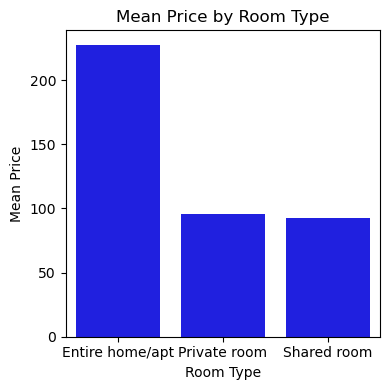

In [12]:
# Bar chart to show the relationship between room type and the price 

# Calculate mean prices for room type and property type
mean_price_by_room_type = df.groupby('room_type')['price'].mean().reset_index()
mean_price_by_property_type = df.groupby('property_type')['price'].mean().reset_index()

# Create a figure with two subplots
fig, ax = plt.subplots(1, 1, figsize=(4, 4))


# Bar chart for mean price by room type
sns.barplot(x='room_type', y='price', data=mean_price_by_room_type, color='blue')
ax.set_title('Mean Price by Room Type')
ax.set_xlabel('Room Type')
ax.set_ylabel('Mean Price')

plt.tight_layout()
plt.show()


The selected variables for these visualizations are crucial in understanding pricing on Airbnb. The "Mean Price by Room Type" plot shows that entire homes/apartments command higher prices than private or shared rooms, likely due to greater privacy and space. Notably, the pricing difference between private and shared rooms is minimal, suggesting that the valuation of privacy, in this context, transcends mere spatial considerations. Instead, it points towards a nuanced understanding of privacy, emphasizing the exclusivity of certain amenities, such as bathrooms. In cases of both private and shared rooms, the commonality of shared bathrooms underlines that the premium on privacy may not be placed on sleeping quarters but rather on the accommodation at large. This observation underscores a refined differentiation in the perception of privacy, which is pivotal in shaping pricing strategies on the Airbnb platform.


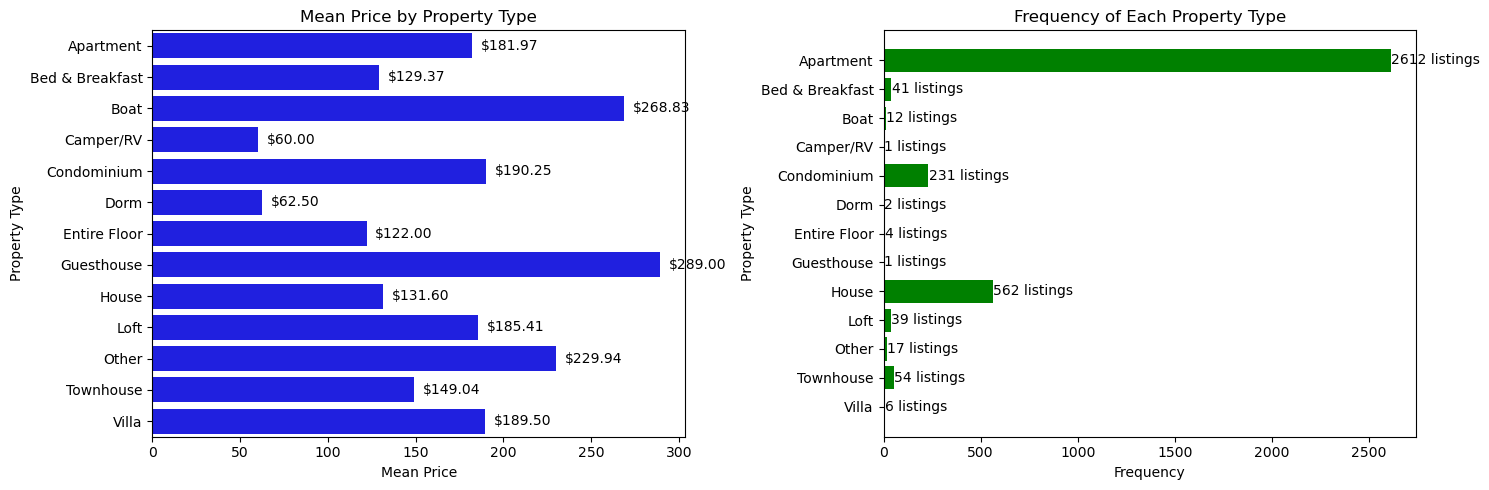

In [13]:

# Calculate mean prices for property type
mean_price_by_property_type = df.groupby('property_type')['price'].mean().reset_index()

# Calculate frequency of each property type
property_type_freq = df['property_type'].value_counts().reset_index()
property_type_freq.columns = ['property_type', 'frequency']

# Merge mean price with frequency for annotations
merged_data = pd.merge(mean_price_by_property_type, property_type_freq, on='property_type')

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart for mean price by property type on the first subplot
sns.barplot(x='price', y='property_type', data=merged_data, ax=ax[0], color='blue')
ax[0].set_title('Mean Price by Property Type')
ax[0].set_xlabel('Mean Price')
ax[0].set_ylabel('Property Type')

# Annotating with mean price to the right of the bar
for index, row in merged_data.iterrows():
    ax[0].text(row['price'] + 5, index, f'${row["price"]:.2f}', va='center', ha='left', color='black')

# Histogram for the frequency of each property type on the second subplot
ax[1].barh(merged_data['property_type'], merged_data['frequency'], color='green')
ax[1].set_title('Frequency of Each Property Type')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Property Type')

# Annotating with frequency to the right of the bar
for index, row in merged_data.iterrows():
    ax[1].text(row['frequency'] + 1, index, f'{row["frequency"]} listings', va='center', ha='left', color='black')

# Invert y-axis to have 'Apartment' on top
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()



The analysis of "Mean Price by Property Type" uncovers significant variations in pricing across different types of accommodations, with properties such as villas and houses often commanding higher prices. This suggests a guest preference for certain property characteristics, for which they are willing to pay a premium.

A limited number of listings for property types like villas, boats, and guesthouses may signal niche markets with restricted supply or demand. These types command higher average prices, indicative of their position within luxury or specialized segments, appealing to wealthier guests in search of distinctive experiences.

Despite the prevalent availability of apartment listings, their maintained high mean price points to a robust market presence. This scenario suggests that the supply, while ample, meets a strong demand that supports higher pricing levels. This condition may be symptomatic of a competitive housing market, likely situated in an urban area characterized by a high cost of living.

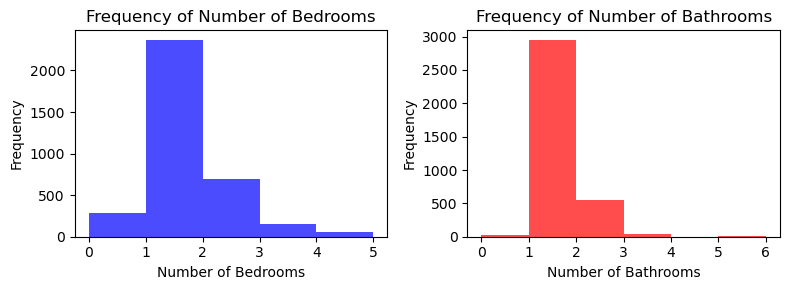

In [14]:
# histogram to show the relationship between price and the number of bedrooms/bathrooms

# Create a figure with two subplots for histograms
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# Histogram for the frequency of number of bedrooms
ax[0].hist(data_cleaned['bedrooms'], bins=range(int(data_cleaned['bedrooms'].max()) + 1), color='blue', alpha=0.7)
ax[0].set_title('Frequency of Number of Bedrooms')
ax[0].set_xlabel('Number of Bedrooms')
ax[0].set_ylabel('Frequency')
ax[0].set_xticks(range(int(data_cleaned['bedrooms'].max()) + 1))

# Histogram for the frequency of number of bathrooms
ax[1].hist(data_cleaned['bathrooms'], bins=range(int(data_cleaned['bathrooms'].max()) + 1), color='red', alpha=0.7)
ax[1].set_title('Frequency of Number of Bathrooms')
ax[1].set_xlabel('Number of Bathrooms')
ax[1].set_ylabel('Frequency')
ax[1].set_xticks(range(int(data_cleaned['bathrooms'].max()) + 1))

plt.tight_layout()
plt.show()

The histograms for the number of bedrooms and bathrooms show that most listings have 1 bedroom and 1 bathroom, which is reflective of the accommodation types that are most commonly available and hence, most commonly priced.

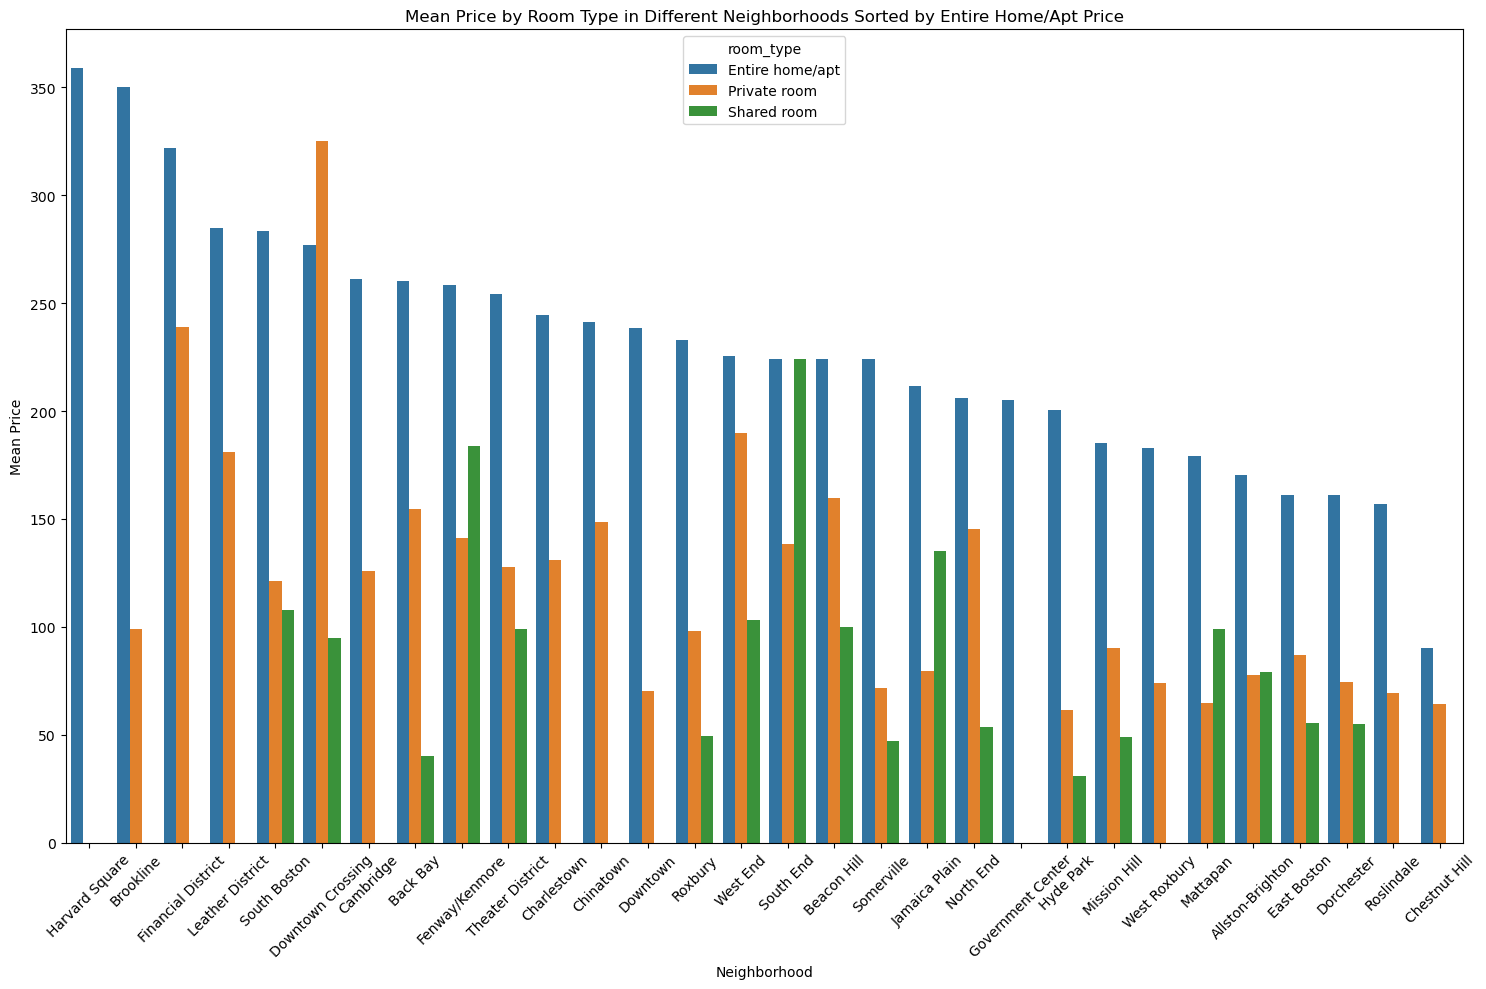

In [15]:
# bar chart using grouping method 

# adding one more x variable to better explain the covariate and such
x = df[['property_type', 'room_type', 'bathrooms', 'bedrooms', 'neighbourhood']]

grouped_data = df.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()

# Pivot the data so that each room type is a column
pivot_data = grouped_data.pivot(index='neighbourhood', columns='room_type', values='price')

# Calculate mean price for entire home/apt or average across all types
pivot_data['mean_entire_home_apt'] = pivot_data['Entire home/apt']
pivot_data['average_price'] = pivot_data.mean(axis=1)

# Sort by mean price of entire home/apt in descending order
sorted_data = pivot_data.sort_values(by='mean_entire_home_apt', ascending=False).reset_index()

# Melt the sorted data to have room types back in long form
melted_sorted_data = sorted_data.melt(id_vars='neighbourhood', value_vars=['Entire home/apt', 'Private room', 'Shared room'])

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='neighbourhood', y='value', hue='room_type', data=melted_sorted_data)

# Adding plot title and labels
plt.title('Mean Price by Room Type in Different Neighborhoods Sorted by Entire Home/Apt Price')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)  # Rotates the x labels to make them readable

# Display the plot
plt.tight_layout()
plt.show()


The visualization above illustrates the mean price for different types of rooms across various neighborhoods in Boston. This graph is directly related to the research question that investigates the correlation between room types and pricing while considering the location variable. The clear pattern that emerges is that entire homes/apartments typically fetch higher prices across all neighborhoods, followed by private rooms, and then shared rooms. This suggests that guests place a premium on privacy and space, which is consistently valued across different areas of the city. The disparities in pricing between neighborhoods also highlight the influence of location on the perceived value of Airbnb listings.

These visualizations all together directly tie to the research question by illustrating the relationship between property characteristics and listing prices. The observed patterns suggest a clear correlation: more private and spacious properties tend to be listed at higher prices. This reinforces the hypothesis that property type and the number of bedrooms and bathrooms can significantly influence the price. Understanding these patterns is essential for hosts to price their listings competitively and for guests to make informed choices based on their preferences and budget.

# Project 2

## The message

housing price and airbnb pricing
compare the mean price of housing and airbnb listing for each zipcode 

### Merging a new dataset

In [16]:
# Load the new dataset 
df_realtor = pd.read_csv('realtor_data.zip.csv')

In [17]:
df_realtor

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


In [27]:
#change the column name zip_code to zipcode so we can merge on the column
df_realtor.rename(columns={'zip_code': 'zipcode'}, inplace=True)

In [37]:
data_type = df_realtor['zipcode'].dtypes
print(f"The data type of 'zipcode' is: {data_type}")

The data type of 'zipcode' is: float64


In [29]:
data_type = df['zipcode'].dtypes
print(f"The data type of 'zipcode' is: {data_type}")

The data type of 'zipcode' is: object


In [40]:
# changing data for consistency

# Convert 'zipcode' column to integer for both DataFrames
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce').fillna(0).astype(int)
df_realtor['zipcode'] = pd.to_numeric(df_realtor['zipcode'], errors='coerce').fillna(0).astype(int)



In [41]:
# Filter df_realtor to include only rows where 'city' is 'Boston'
df_realtor_boston = df_realtor[df_realtor['city'] == 'Boston']

df_realtor_boston

,status,bed,bath,acre_lot,city,state,zipcode,house_size,prev_sold_date,price
100368,for_sale,1.0,1.0,NaN,Boston,Massachusetts,2132,708.0,1988-01-21,329000.0
100371,for_sale,1.0,1.0,0.02,Boston,Massachusetts,2135,688.0,2018-06-01,650000.0
100372,for_sale,2.0,1.0,0.03,Boston,Massachusetts,2130,1250.0,2007-08-30,739000.0
100373,for_sale,2.0,3.0,NaN,Boston,Massachusetts,2115,2226.0,NaN,4495000.0
100374,for_sale,9.0,3.0,0.09,Boston,Massachusetts,2131,3204.0,1998-08-06,1200000.0
...,...,...,...,...,...,...,...,...,...,...
1400594,for_sale,2.0,1.0,NaN,Boston,New York,14075,500.0,NaN,15000.0
1400648,for_sale,3.0,2.0,0.36,Boston,New York,14025,1566.0,2021-01-28,210000.0
1400693,for_sale,3.0,1.0,0.35,Boston,New York,14025,1040.0,NaN,199900.0
1400823,for_sale,3.0,1.0,0.35,Boston,New York,14025,1040.0,NaN,199900.0


In [39]:
df['zipcode']

0       2131
1       2131
2       2131
3          0
4       2131
        ... 
3580    2143
3581    2446
3582    2141
3583    2145
3584    2145
Name: zipcode, Length: 3585, dtype: int32

In [42]:
# merging datasets

merged_df = pd.merge(df, df_realtor_boston, on='zipcode', how='inner')

merged_df


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_entire_home_apt,status,bed,bath,acre_lot,city_y,state_y,house_size,prev_sold_date,price_y
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,1,for_sale,9.0,3.0,0.09,Boston,Massachusetts,3204.0,1998-08-06,1200000.0
1,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,1,for_sale,1.0,1.0,0.01,Boston,Massachusetts,617.0,2005-04-12,299000.0
2,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,1,for_sale,3.0,2.0,0.10,Boston,Massachusetts,1294.0,NaN,599000.0
3,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,1,for_sale,3.0,3.0,NaN,Boston,Massachusetts,1380.0,1998-04-28,490000.0
4,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,1,for_sale,6.0,4.0,0.10,Boston,Massachusetts,2392.0,1997-12-15,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289786,5384923,https://www.airbnb.com/rooms/5384923,20160906204935,2016-09-07,Historic Charm with Modern Details,Located in the historic neighborhood of South ...,On the main level of a brick townhouse built i...,Located in the historic neighborhood of South ...,none,Whether you are in town for business or on vac...,...,1,for_sale,2.0,2.0,NaN,Boston,Massachusetts,1153.0,NaN,965000.0
5289787,5384923,https://www.airbnb.com/rooms/5384923,20160906204935,2016-09-07,Historic Charm with Modern Details,Located in the historic neighborhood of South ...,On the main level of a brick townhouse built i...,Located in the historic neighborhood of South ...,none,Whether you are in town for business or on vac...,...,1,for_sale,2.0,2.0,0.02,Boston,Massachusetts,1049.0,NaN,839000.0
5289788,5384923,https://www.airbnb.com/rooms/5384923,20160906204935,2016-09-07,Historic Charm with Modern Details,Located in the historic neighborhood of South ...,On the main level of a brick townhouse built i...,Located in the historic neighborhood of South ...,none,Whether you are in town for business or on vac...,...,1,for_sale,3.0,1.0,0.02,Boston,Massachusetts,964.0,2000-06-02,600000.0
5289789,5384923,https://www.airbnb.com/rooms/5384923,20160906204935,2016-09-07,Historic Charm with Modern Details,Located in the historic neighborhood of South ...,On the main level of a brick townhouse built i...,Located in the historic neighborhood of South ...,none,Whether you are in town for business or on vac...,...,1,for_sale,2.0,3.0,0.03,Boston,Massachusetts,1429.0,2009-09-04,799000.0


In [24]:
# Convert the columns to a list and print
column_names = merged_df.columns.tolist()
print(column_names)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city_x', 'state_x', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price_x', 'weekly_price', 'monthly_pri

In [43]:
import pandas as pd

# Assuming 'merged_df' is your DataFrame and it contains columns named 'zipcode', 'price_x' for Airbnb listings, and 'price_y' for housing prices

# Group the data by 'zipcode' and calculate mean prices
mean_prices_by_zipcode = merged_df.groupby('zipcode').agg(
    mean_price_airbnb=('price_x', 'mean'),  # Calculate mean for Airbnb prices
    mean_price_housing=('price_y', 'mean')  # Calculate mean for housing prices
).reset_index()

# Rename columns for clarity
mean_prices_by_zipcode.rename(columns={'mean_price_airbnb': 'price_x', 'mean_price_housing': 'price_y'}, inplace=True)

# Display the table
print(mean_prices_by_zipcode)


    zipcode     price_x       price_y
0      2108  230.361111  5.827576e+06
1      2109  238.941176  2.368287e+06
2      2110  274.076923  2.613102e+06
3      2111  253.535354  2.531354e+06
4      2113  190.158416  1.237833e+06
5      2114  213.238095  2.287038e+06
6      2115  195.065089  3.229958e+06
7      2116  229.180412  3.079320e+06
8      2118  217.789474  1.724349e+06
9      2119  126.110000  9.229489e+05
10     2120  126.173913  2.031027e+06
11     2121  101.310345  1.097326e+06
12     2122  114.409091  9.475933e+05
13     2124   81.200000  1.236660e+06
14     2125   95.527132  9.106825e+05
15     2126   80.958333  1.042996e+06
16     2127  189.938889  1.155898e+06
17     2128  119.684932  8.544748e+05
18     2129  221.844444  1.151626e+06
19     2130  138.746224  8.945595e+05
20     2131   96.907692  7.398666e+05
21     2132  103.783784  6.559709e+05
22     2134  108.836207  1.086857e+06
23     2135  120.395349  9.630812e+05
24     2136   88.793103  6.766595e+05
25     2210 

## Mapping

In [ ]:
# installing necessary packages
!pip install q qeds fiona geopandas gensim folium pyLDAvis descartes contextily

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
import folium

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
#import qeds
#qeds.themes.mpl_style();

In [ ]:
zipcode = df['zipcode']
latitude = df['latitude']
longitude = df['longitude']
neighbourhood = df['neighbourhood']
df_map = pd.DataFrame({
    'zipcode': df['zipcode'],
    'latitude': df['latitude'],
    'longitude': df['longitude'],
    'neighbourhood': df['neighbourhood']
})
df_map.head()

,zipcode,latitude,longitude,neighbourhood
0,02131,42.282619,-71.133068,Roslindale
1,02131,42.286241,-71.134374,Roslindale
2,02131,42.292438,-71.135765,Roslindale
3,nan,42.281106,-71.121021,NaN
4,02131,42.284512,-71.136258,Roslindale


In [ ]:
df_map["Coordinates"] = list(zip(df.longitude, df.latitude))
df_map.head()

,zipcode,latitude,longitude,neighbourhood,Coordinates
0,02131,42.282619,-71.133068,Roslindale,"(-71.13306792912681, 42.28261879577949)"
1,02131,42.286241,-71.134374,Roslindale,"(-71.13437396457161, 42.286240821867416)"
2,02131,42.292438,-71.135765,Roslindale,"(-71.13576525374667, 42.2924378866568)"
3,nan,42.281106,-71.121021,NaN,"(-71.12102117350553, 42.28110618827366)"
4,02131,42.284512,-71.136258,Roslindale,"(-71.1362580468337, 42.28451220982457)"


In [ ]:
df_map["Coordinates"] = df_map["Coordinates"].apply(Point)
df_map.head()

,zipcode,latitude,longitude,neighbourhood,Coordinates
0,02131,42.282619,-71.133068,Roslindale,POINT (-71.13306792912681 42.28261879577949)
1,02131,42.286241,-71.134374,Roslindale,POINT (-71.13437396457161 42.286240821867416)
2,02131,42.292438,-71.135765,Roslindale,POINT (-71.13576525374667 42.2924378866568)
3,nan,42.281106,-71.121021,NaN,POINT (-71.12102117350553 42.28110618827366)
4,02131,42.284512,-71.136258,Roslindale,POINT (-71.1362580468337 42.28451220982457)


In [ ]:
gdf_points = gpd.GeoDataFrame(df_map, geometry="Coordinates")
gdf_points.head()

,zipcode,latitude,longitude,neighbourhood,Coordinates
0,02131,42.282619,-71.133068,Roslindale,POINT (-71.13307 42.28262)
1,02131,42.286241,-71.134374,Roslindale,POINT (-71.13437 42.28624)
2,02131,42.292438,-71.135765,Roslindale,POINT (-71.13577 42.29244)
3,nan,42.281106,-71.121021,NaN,POINT (-71.12102 42.28111)
4,02131,42.284512,-71.136258,Roslindale,POINT (-71.13626 42.28451)


In [ ]:
print('\nThe geometry column is:', gdf_points.geometry.name)


The geometry column is: Coordinates


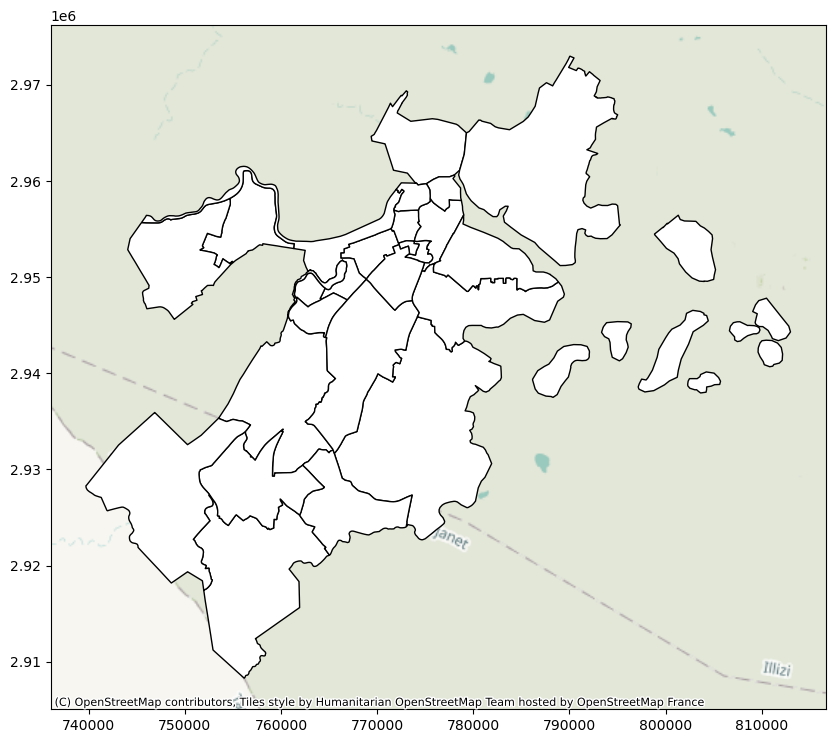

ValueError: Image size of 2068938638x-933768760 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x1000 with 1 Axes>

In [ ]:
# Map Boston city by neighbourhoods

gdf = gpd.read_file('Census2020_BG_Neighborhoods.shp')
gdf.crs = "EPSG:3857"

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')

# Add a basemap
# The crs parameter should match the one used in your geospatial data for Boston neighborhoods.
ctx.add_basemap(ax, crs=gdf.crs)
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")

for idx, row in gdf.iterrows():
    # Get the centroid of the polygon to place the text
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, row['BlockGr202'], fontsize=8, ha='center', va='center')

# Set the bounds for the plot
ax.set_xlim(-71.2, -70.9)
ax.set_ylim(42.22, 42.4)


plt.show()

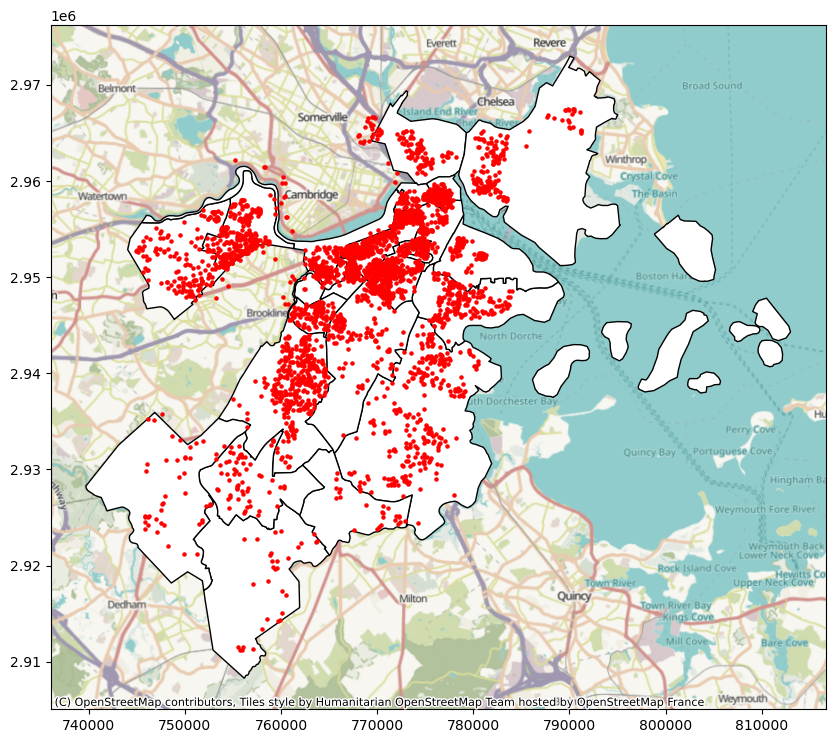

In [ ]:
# Map Boston city by neighbourhoods

# Load the Boston neighborhoods shapefile
gdf = gpd.read_file('Census2020_BG_Neighborhoods.shp')

# Assuming df_map is your DataFrame with points to plot, having 'lat' and 'lon' columns
# Convert df_map to a GeoDataFrame with the correct CRS to match the basemap
gdf_points = gpd.GeoDataFrame(df_map, geometry=gpd.points_from_xy(df_map['longitude'], df_map['latitude']))
gdf_points.crs = "EPSG:4326"  # Set the CRS to WGS84 if your longitude and latitude are in degrees

# Now plot the neighborhoods
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')

# Add the points from df_map on top of the neighborhood plot
gdf_points.to_crs(gdf.crs).plot(ax=ax, color='red', markersize=5)  # Convert CRS and plot

# Add a basemap 
ctx.add_basemap(ax, crs=gdf.crs)

plt.show()

### Merging a new dataset

In [ ]:
# Ensure the 'price' column is treated as a string
df['price'] = df['price'].astype(str)

# Remove '$' and ',' from the 'price' column, then convert it to numeric
df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# Now proceed with your calculation
mean_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean().reset_index()


In [ ]:
mean_price_by_neighborhood

,neighbourhood,price
0,Allston-Brighton,114.162088
1,Back Bay,245.457045
2,Beacon Hill,212.080460
3,Brookline,130.375000
4,Cambridge,203.000000
5,Charlestown,210.050633
6,Chestnut Hill,70.750000
7,Chinatown,235.410256
8,Dorchester,97.451282
9,Downtown,196.500000


In [ ]:
gdf

,OBJECTID,BlockGr202,Shape_Leng,Shape_Area,geometry
0,1,Allston,35808.619278,4.154760e+07,"POLYGON ((758525.831 2959265.091, 758671.805 2..."
1,2,Back Bay,18815.103609,1.538724e+07,"POLYGON ((771539.219 2954877.239, 771575.861 2..."
2,3,Beacon Hill,11668.951169,7.891524e+06,"POLYGON ((774297.440 2956963.715, 774312.270 2..."
3,4,Brighton,47051.804654,7.658156e+07,"POLYGON ((754177.850 2955969.986, 754151.917 2..."
4,5,Charlestown,33910.754786,5.127021e+07,"POLYGON ((773132.501 2968902.714, 773021.919 2..."
5,6,Chinatown,10843.828683,3.436019e+06,"POLYGON ((775639.044 2953734.864, 775595.372 2..."
6,7,Dorchester,80692.139164,2.193038e+08,"POLYGON ((775867.212 2944875.352, 775903.995 2..."
7,8,Downtown,32767.370822,2.159010e+07,"MULTIPOLYGON (((773867.690 2953737.779, 773824..."
8,9,East Boston,79266.383121,1.948618e+08,"POLYGON ((790588.304 2971526.017, 790707.690 2..."
9,10,Fenway,101396.628071,4.281357e+07,"POLYGON ((756955.208 2961112.383, 757042.651 2..."


In [ ]:
# need to change the column name to merge datasets
gdf.rename(columns={'BlockGr202': 'neighbourhood'}, inplace=True)

In [ ]:
# need to change names of neighbourhoods 

In [ ]:
# Merge the GeoDataFrame with the mean price DataFrame
gdf_combined = gdf_combined.merge(mean_price_by_neighborhood, on='neighbourhood', how='left')

# Check the merge result
print(gdf_combined.head())


NameError: name 'gdf_combined' is not defined

In [ ]:
gdf_combined

,CombinedNeighborhood,geometry,OBJECTID,neighbourhood,Shape_Leng,Shape_Area,price_x,price_y
0,Allston-Brighton,"POLYGON ((754796.098 2951330.551, 754762.975 2...",1,Allston,35808.619278,4.154760e+07,NaN,NaN
1,Back Bay,"POLYGON ((771539.219 2954877.239, 771575.861 2...",2,Back Bay,18815.103609,1.538724e+07,245.457045,245.457045
2,Beacon Hill,"POLYGON ((774297.440 2956963.715, 774312.270 2...",3,Beacon Hill,11668.951169,7.891524e+06,212.080460,212.080460
3,Charlestown,"POLYGON ((773132.501 2968902.714, 773021.919 2...",5,Charlestown,33910.754786,5.127021e+07,210.050633,210.050633
4,Chinatown,"POLYGON ((775639.044 2953734.864, 775595.372 2...",6,Chinatown,10843.828683,3.436019e+06,235.410256,235.410256
5,Dorchester,"POLYGON ((775867.212 2944875.352, 775903.995 2...",7,Dorchester,80692.139164,2.193038e+08,97.451282,97.451282
6,Downtown,"MULTIPOLYGON (((773824.886 2953491.571, 773962...",8,Downtown,32767.370822,2.159010e+07,196.500000,196.500000
7,East Boston,"POLYGON ((790588.304 2971526.017, 790707.690 2...",9,East Boston,79266.383121,1.948618e+08,124.059829,124.059829
8,Fenway,"POLYGON ((756955.208 2961112.383, 757042.651 2...",10,Fenway,101396.628071,4.281357e+07,NaN,NaN
9,Harbor Islands,"MULTIPOLYGON (((802826.470 2939443.967, 803277...",11,Harbor Islands,113958.523276,9.323786e+07,NaN,NaN


In [ ]:
gdf_combined.crs = "EPSG:3857"
print(gdf_combined.crs)

EPSG:3857


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Plot the neighborhoods with prices using OrRd colormap
gdf_combined.dropna(subset=['price']).plot(column='price', ax=ax, legend=True,
                                  legend_kwds={'label': "Mean Airbnb Price by Neighborhood",
                                               'shrink': 0.5},
                                  cmap='OrRd', edgecolor="k")

# Plot the neighborhoods without prices in grey and keep the borders
gdf_combined[gdf_combined['price'].isna()].plot(ax=ax, color='grey', edgecolor="k")

# Add a basemap for context
ctx.add_basemap(ax, crs=gdf_combined.crs)

# Remove axis
ax.set_axis_off()

plt.show()

## Conclusion


The findings from the project underscore a significant correlation between property attributes and their pricing on Airbnb in Boston. The data indicates that entire homes or apartments generally command higher prices, reinforcing the notion that space and privacy are highly valued in the short-term rental market. The variability in pricing across neighborhoods suggests that location is a crucial determinant of pricing, potentially influenced by factors such as proximity to city attractions, neighborhood safety, and local amenities.


These observations align with economic theories on goods differentiation and consumer preference, highlighting that consumers are willing to pay premium prices for goods that better satisfy their preferences—in this case, accommodation that offers more space and privacy. The study's implication for hosts on Airbnb is clear: understanding these preferences can lead to more strategic pricing and better market positioning. Future research could expand on this by exploring the impact of additional factors such as seasonal trends, special events, and the effect of reviews on pricing